## Programming for Data Analyis Project Semester (2) 2020
Brendan Ryan GMIT

I have picked on a real world phenomenon in my own professional life. This is what  is the likelyhood of a member of the financial institution I work in availing of a service (in this case take a loan), based on their age, sex and employment status and then look at the the type of product they normally borrow for. 

I will be using the following variables

- AGE
- Month (month of application)
- Date (date of appliation)
- Employment Status
- Gender
- Loan Type
- Loan Amount Range
- Loan Amount


Import the required libraries
** Give brief descriptoin of what each library does..

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Import our Data Set based on the output of ones years lending 


In [2]:
import pandas as pd
df = pd.read_csv('analysis.csv')

## Test that our data set has loaded
** note maybe add in here only to load some rows

In [3]:
df

,Age,Month,Date,Employment Status,Gender,Loan Purpose,Loan Amount Range,Loan Amount
0,19,October,43742,FULL TIME,Male,Car,"10,001 - 15,000",13000.0
1,19,August,43705,STUDENT,Male,Student,"1,001 - 5,000",3000.0
2,19,March,43552,FULL TIME,Male,Personal,"5,001 - 10,000",7000.0
3,19,September,43736,STUDENT,FEMALE,Student,"0 - 1,000",1000.0
4,19,August,43699,STUDENT,Male,Student,"5,001 - 10,000",10000.0
...,...,...,...,...,...,...,...,...
3931,85,June,43623,RETIRED,FEMALE,Personal,"0 - 1,000",600.0
3932,85,February,43521,RETIRED,FEMALE,Personal,"0 - 1,000",1000.0
3933,85,December,43801,RETIRED,FEMALE,Personal,"1,001 - 5,000",2000.0
3934,87,March,43525,RETIRED,FEMALE,Personal,"1,001 - 5,000",2000.0


Test that our improted data looks ok by using df.head and df.tail 

In [4]:
df.head()

,Age,Month,Date,Employment Status,Gender,Loan Purpose,Loan Amount Range,Loan Amount
0,19,October,43742,FULL TIME,Male,Car,"10,001 - 15,000",13000.0
1,19,August,43705,STUDENT,Male,Student,"1,001 - 5,000",3000.0
2,19,March,43552,FULL TIME,Male,Personal,"5,001 - 10,000",7000.0
3,19,September,43736,STUDENT,FEMALE,Student,"0 - 1,000",1000.0
4,19,August,43699,STUDENT,Male,Student,"5,001 - 10,000",10000.0


In [5]:
df.tail()

,Age,Month,Date,Employment Status,Gender,Loan Purpose,Loan Amount Range,Loan Amount
3931,85,June,43623,RETIRED,FEMALE,Personal,"0 - 1,000",600.0
3932,85,February,43521,RETIRED,FEMALE,Personal,"0 - 1,000",1000.0
3933,85,December,43801,RETIRED,FEMALE,Personal,"1,001 - 5,000",2000.0
3934,87,March,43525,RETIRED,FEMALE,Personal,"1,001 - 5,000",2000.0
3935,89,March,43552,RETIRED,FEMALE,Personal,"1,001 - 5,000",3000.0


Everything looks ok above we can see the shape of our dataframe is correct

Lets have a look at the typoe of varibales we have to work with using the df.dtypes funtion 

In [6]:
df.dtypes

Age                    int64
Month                 object
Date                   int64
Employment Status     object
Gender                object
Loan Purpose          object
Loan Amount Range     object
Loan Amount          float64
dtype: object

Ok as we can see from above we are dealing with 2 varibales of type object and 1 variable of type int64

In [7]:
df.describe()

,Age,Date,Loan Amount
count,3936.000000,3936.000000,3936.000000
mean,45.241362,43654.225610,4755.631979
std,15.595089,104.040777,8383.672677
min,19.000000,43467.000000,0.000000
25%,32.000000,43563.000000,700.000000
50%,44.000000,43657.000000,2000.000000
75%,57.000000,43746.000000,5000.000000
max,89.000000,43830.000000,102500.000000


ok as Age is our only colum of type integer it is the only one which will be returned for statistical values as shown above 

lets have a look at df.info which is another usefulo tol to give us more info on our dataframe

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3936 entries, 0 to 3935
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                3936 non-null   int64  
 1   Month              3936 non-null   object 
 2   Date               3936 non-null   int64  
 3   Employment Status  3936 non-null   object 
 4   Gender             3936 non-null   object 
 5   Loan Purpose       3936 non-null   object 
 6   Loan Amount Range  3936 non-null   object 
 7   Loan Amount        3936 non-null   float64
dtypes: float64(1), int64(2), object(5)
memory usage: 246.1+ KB


look at making the Financial month a date time # help from https://https://pbpython.com/pandas_dtypes.html

In [9]:
pd.to_datetime(df["Date"])# - not working lets come back to this and research some more

0      1970-01-01 00:00:00.000043742
1      1970-01-01 00:00:00.000043705
2      1970-01-01 00:00:00.000043552
3      1970-01-01 00:00:00.000043736
4      1970-01-01 00:00:00.000043699
                    ...             
3931   1970-01-01 00:00:00.000043623
3932   1970-01-01 00:00:00.000043521
3933   1970-01-01 00:00:00.000043801
3934   1970-01-01 00:00:00.000043525
3935   1970-01-01 00:00:00.000043552
Name: Date, Length: 3936, dtype: datetime64[ns]

### Best practice convernt some of our data types into categories 

In [10]:
df[["Month","Gender", "Employment Status","Loan Purpose"]] = df[["Month","Gender", "Employment Status","Loan Purpose"]].astype("category")

In [11]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3936 entries, 0 to 3935
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Age                3936 non-null   int64   
 1   Month              3936 non-null   category
 2   Date               3936 non-null   int64   
 3   Employment Status  3936 non-null   category
 4   Gender             3936 non-null   category
 5   Loan Purpose       3936 non-null   category
 6   Loan Amount Range  3936 non-null   object  
 7   Loan Amount        3936 non-null   float64 
dtypes: category(4), float64(1), int64(2), object(1)
memory usage: 139.6+ KB


## Reviewing the data to figure out the types of distributions

Count plot
This is essentially the same as barplot except the estimator is explicitly counting the number of occurrences. Which is why we only pass the x value. Command for creating countplot is:

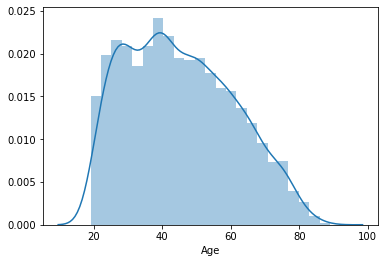

In [34]:
#df.Age.plot(kind='kde');
#df.groupby('Gender').Age.plot(kind='kde')
#df.Age.plot(kind='kde')
Age = df["Age"]
sns.distplot(Age);

In [13]:
df.Age.describe()

count    3936.000000
mean       45.241362
std        15.595089
min        19.000000
25%        32.000000
50%        44.000000
75%        57.000000
max        89.000000
Name: Age, dtype: float64

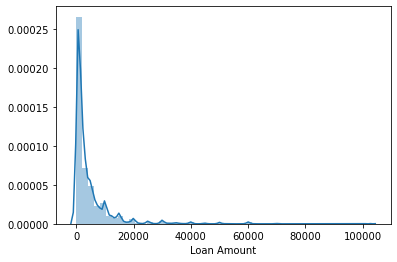

In [14]:
#df.Age.plot(kind='kde');
#df.groupby('Gender').Age.plot(kind='kde')
#df.Age.plot(kind='kde')
#Loan Amount = df["Loan Amount"]
sns.distplot(df["Loan Amount"]);

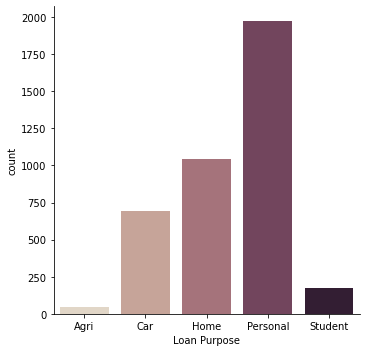

In [15]:
sns.catplot(x="Loan Purpose", kind="count", palette="ch:.25", data=df)
#https://seaborn.pydata.org/tutorial/categorical.html

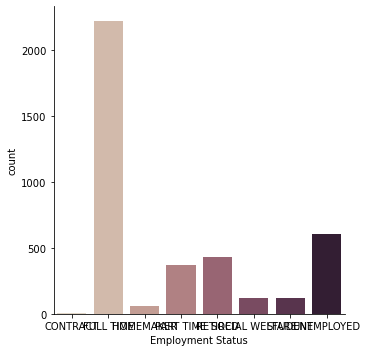

In [26]:
sns.catplot(x="Employment Status", kind="count", palette="ch:.25", data=df);
#https://seaborn.pydata.org/tutorial/categorical.html

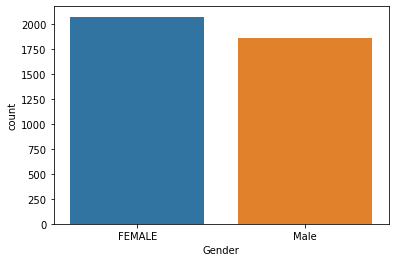

In [17]:
sns.countplot(x='Gender',data=df)
#https://datascienceplus.com/seaborn-categorical-plots-in-python/

In [18]:
df[["Gender","Age"]].groupby("Gender").count()
#https://pandas.pydata.org/pandas-docs/dev/getting_started/intro_tutorials/06_calculate_statistics.html

,Age
Gender,
FEMALE,2072
Male,1864


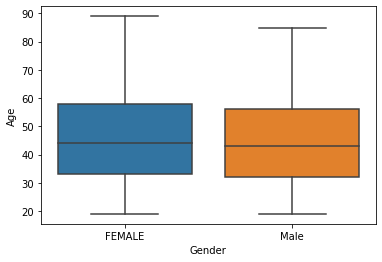

In [19]:
sns.boxplot(x='Gender',y="Age",data=df);

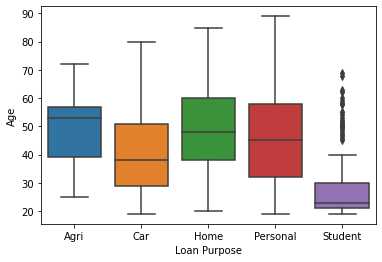

In [21]:
sns.boxplot(x='Loan Purpose',y="Age",data=df);

In [ ]:
sns.catplot(x="Loan Type", y="Age", hue="Gender", kind="box", data=df);
#https://seaborn.pydata.org/tutorial/categorical.html

In [ ]:
sns.catplot(x="Gender", y="Age", hue="Loan Type", kind="bar", data=df);

In [ ]:
%matplotlib inline
sns.set(style="darkgrid")
ax = sns.countplot(x='Loan Type',hue="Gender" , data=df)
plt.show()

In [ ]:
#https://towardsdatascience.com/hands-on-python-data-visualization-seaborn-count-plot-90e823599012

## Create the sample random data



Start with the creation of the sample data as per the AGE - as we say above the distribtion of the Age varibale is closest aligned to that of a Normal Distribution

I am going to use the pands df.describe fuction to get the mean and standard deviation of the data in teh Age column - we will use thes as part
of our Numpy random.normal fucntion to get some random data

In [ ]:
df.Age.describe()

Testing to see can i create some variables - neeed to set proabilty - how will i do this accross the varibales ? Maybe need a loop or functions?

In [ ]:
n_samples = 200
mean_age, deviation_age = 45.241362, 15.595089

In [27]:
sample_age = np.random.normal(45.241362,15.595089,200).astype(int)

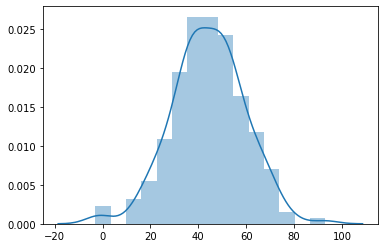

In [32]:
sns.distplot(sample_age);

In [29]:
#create some random varibales just for testing at the minute
#researched https://www.delftstack.com/howto/python-pandas/how-to-randomly-shuffle-dataframe-rows-in-pandas/


Loan_Types = ("Personal", "Car", "Agri", "Student","Home" )
Gender = ("Male", "Female")


Random_Loan = np.random.choice(Loan_Types, size=200)
Random_Gender = np.random.choice(Gender,200,.5)

#Create a test data frame based on above to see does it work
sample_df = pd.DataFrame({'sample_age':sample_age ,
                   'sample_Loan_type':Random_Loan ,
                   'sample_gender': Random_Gender})
print(sample_df)

     sample_age sample_Loan_type sample_gender
0            31              Car          Male
1            22              Car        Female
2            69         Personal        Female
3            33             Agri          Male
4            23              Car          Male
..          ...              ...           ...
195          18         Personal        Female
196          50          Student          Male
197          55          Student        Female
198          29          Student        Female
199          64         Personal        Female

[200 rows x 3 columns]


In [35]:
np.random.permutation(sample_df)

array([[51, 'Personal', 'Male'],
       [57, 'Home', 'Male'],
       [28, 'Personal', 'Female'],
       [48, 'Personal', 'Male'],
       [50, 'Car', 'Female'],
       [24, 'Student', 'Male'],
       [51, 'Home', 'Female'],
       [48, 'Personal', 'Female'],
       [12, 'Home', 'Male'],
       [18, 'Personal', 'Female'],
       [64, 'Agri', 'Male'],
       [29, 'Student', 'Female'],
       [52, 'Home', 'Male'],
       [54, 'Personal', 'Female'],
       [68, 'Car', 'Male'],
       [56, 'Personal', 'Male'],
       [24, 'Agri', 'Male'],
       [55, 'Home', 'Female'],
       [35, 'Agri', 'Male'],
       [59, 'Agri', 'Male'],
       [53, 'Home', 'Female'],
       [33, 'Agri', 'Male'],
       [49, 'Car', 'Male'],
       [39, 'Car', 'Male'],
       [69, 'Car', 'Female'],
       [45, 'Car', 'Female'],
       [39, 'Student', 'Female'],
       [63, 'Car', 'Male'],
       [-3, 'Home', 'Male'],
       [45, 'Student', 'Male'],
       [59, 'Personal', 'Male'],
       [22, 'Car', 'Female'],
       [35